In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hepatitis-data/hepatitis_csv.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Reading the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/hepatitis-data/hepatitis_csv.csv")
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


Listing the columns provided in the dataset

In [4]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

Getting the shape => (rows, cols) of the dataset

In [5]:
df.shape

(155, 20)

Getting some information for each of the columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

Describing each of the columns of the dataset by values such as count, mean, standard deviation, minimum value,maximum value, Quarter Percentile, Half Percentile and 75% Percentile

In [7]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


See how many null values(NA) values are there in each of the columns of the dataset

In [8]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

# Seeing the Correlation(statistical relationship) among the various features of the dataset. 

A positive correlation means a variable increases / decreases as other other variable increases / decreases respectively. Negative Correlation means a variable increases / decreases as the other variable decreases / increases respectively

In [9]:
df.corr()

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


Dropping the 'protime' column in the dataframe as it contains a lot of null values and is of no use in the EDA

In [10]:
df.drop("protime", axis = 1, inplace=True)
df.shape

(155, 19)

Creating a dataframe which only contains numeric data of the main dataset

In [11]:
numeric_data = df._get_numeric_data()
numeric_data.head()

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,histology
0,30,False,1.0,85.0,18.0,4.0,False
1,50,False,0.9,135.0,42.0,3.5,False
2,78,False,0.7,96.0,32.0,4.0,False
3,31,True,0.7,46.0,52.0,4.0,False
4,34,False,1.0,NaN,200.0,4.0,False


Dropping the columns 'antivirals' and 'histology' as they are not numeric data

In [12]:
numeric_data.drop('antivirals', axis=1, inplace=True)
numeric_data.drop('histology', axis=1, inplace=True)

In [13]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            155 non-null    int64  
 1   bilirubin      149 non-null    float64
 2   alk_phosphate  126 non-null    float64
 3   sgot           151 non-null    float64
 4   albumin        139 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


# Creating a Correlation Plot to understand the correlation among various features in a better way visually

Using Seaborn Library

<AxesSubplot:>

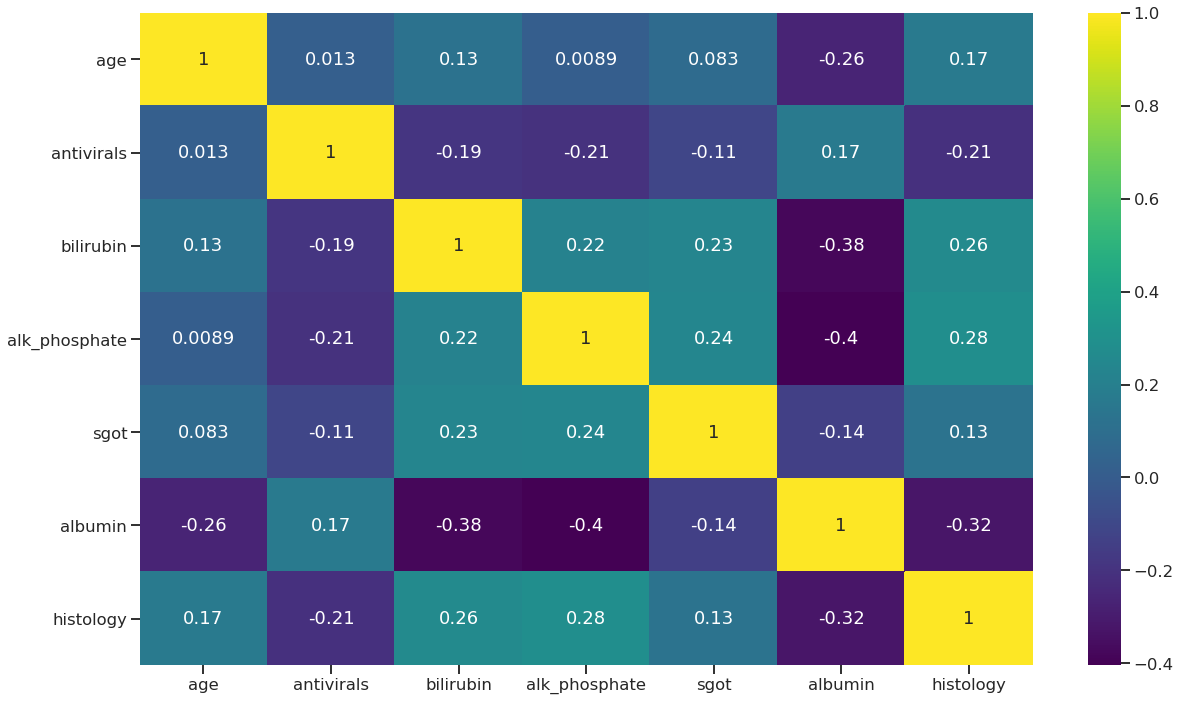

In [14]:
sns.set(style = "ticks", context = "talk")
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

The correlation plot here shows us that features 'bilirubin' and 'alk_phosphate' both have higher positive correlation with 'histology' and features 'bilirubin' and 'alk_phosphate' both hae higher negative correlation with 'albumin'

Using plotly.express library

In [15]:
x = list(df.corr().columns)
y = list(df.corr().index)
values = np.array(df.corr().values)
fig = go.Figure(data=go.Heatmap(
    x = x,
    y = y,
    z = values,
    hoverongaps = False
))
fig.show()

Creating a displot using seaborn library

distplot(now deprecated to 'displot') => combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions

<Figure size 1440x720 with 0 Axes>

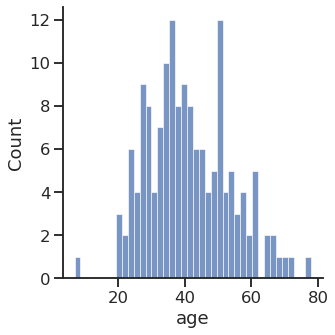

In [16]:
plt.figure(figsize=(20, 10))
sns.displot(df.age, bins=40)

This shows that most of the people in the dataset have age between 25-50(approx.) with maximum people having age = 36-38 and 50-55. Only a few people with age<=30 and age>=62 suffer from Hepatitis

Creating a KDE Plot using seaborn library

KDE plot - Kernel Density Estimation Plot - visualizes the distribution of obserations in a dataset

<AxesSubplot:xlabel='age', ylabel='Density'>

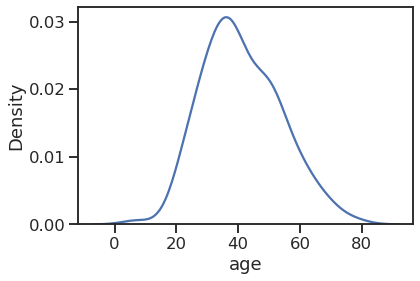

In [17]:
sns.kdeplot(df.age)

Similar to the displot, the kde plot shows a bit more clearer distribution of age and we can clearly see that the average age of people suffering from Hepatitis lies in the range 35-40

In [18]:
px.histogram(df.age)

Various Plots for Checking the Bilirubin distribution for various integer values

<Figure size 1440x720 with 0 Axes>

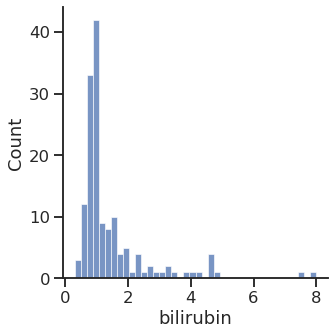

In [19]:
plt.figure(figsize=(20, 10))
sns.displot(df.bilirubin, bins=40)

<AxesSubplot:xlabel='bilirubin', ylabel='Density'>

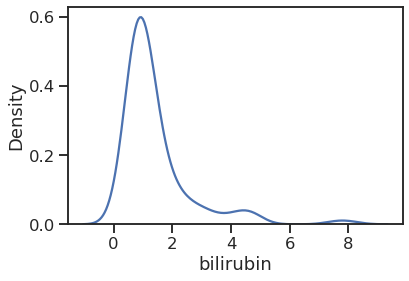

In [20]:
sns.kdeplot(df.bilirubin)

In [21]:
px.histogram(df.bilirubin)

All these plots indicate that people with lower bilirubin (values between 0-2) are more prone to Hepatitis

<Figure size 1440x720 with 0 Axes>

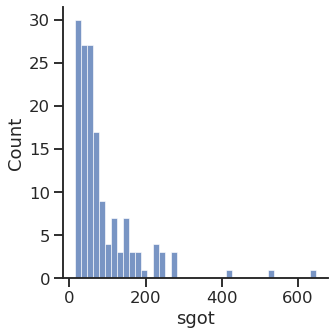

In [22]:
plt.figure(figsize=(20, 10))
sns.displot(df.sgot, bins=40)

<AxesSubplot:xlabel='sgot', ylabel='Density'>

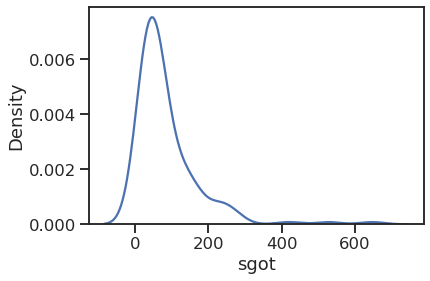

In [23]:
sns.kdeplot(df.sgot)

In [24]:
px.histogram(df.sgot)

<Figure size 1440x720 with 0 Axes>

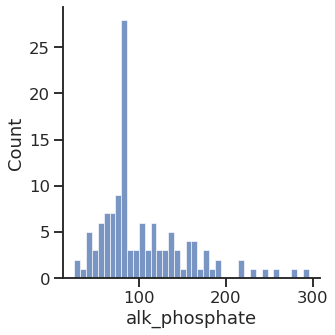

In [25]:
plt.figure(figsize=(20, 10))
sns.displot(df.alk_phosphate, bins=40)

<AxesSubplot:xlabel='alk_phosphate', ylabel='Density'>

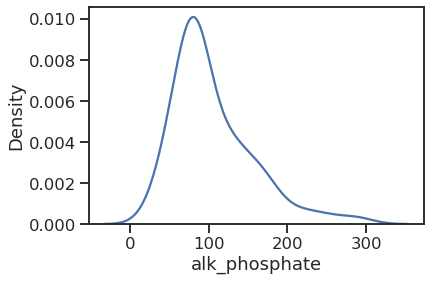

In [26]:
sns.kdeplot(df.alk_phosphate)

In [27]:
px.histogram(df.alk_phosphate)

This implies that Maximum people have alkaline phosphate value of 80-100

# Comparing the Gender Distribution in the given Dataset

Bar Chart for the Gender Distribution using matplotlib

<AxesSubplot:title={'center':'Gender Distribution'}>

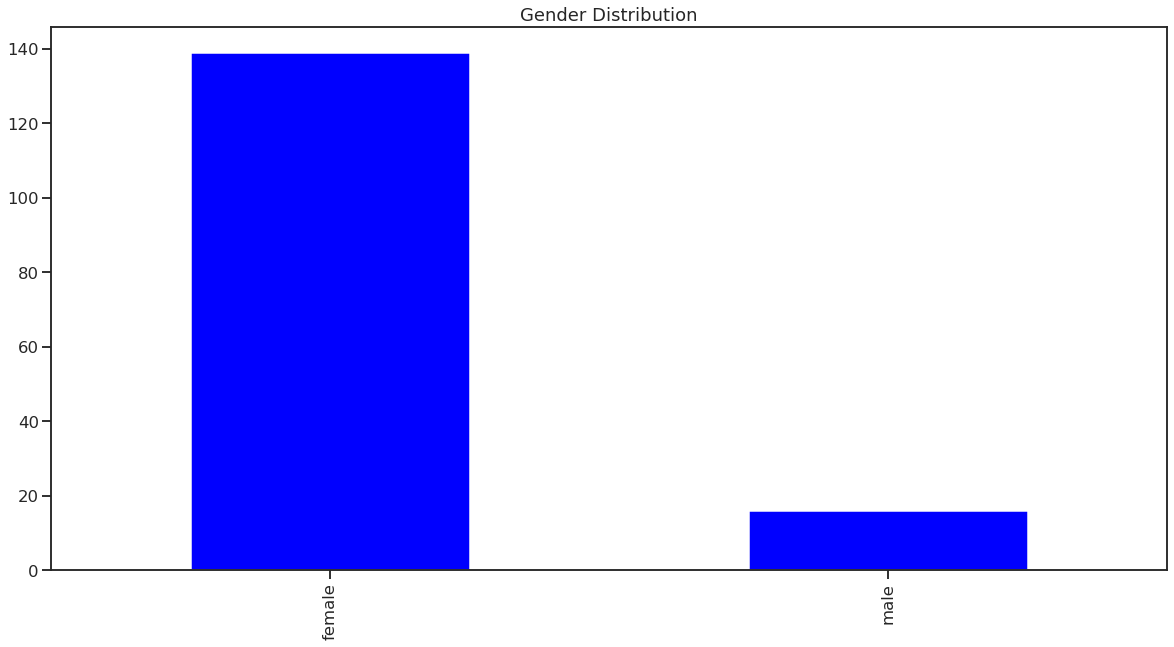

In [28]:
plt.figure(figsize=(20, 10))
df['sex'].value_counts().plot(kind="bar", color='blue', title='Gender Distribution')

Piechart for the gender Distribution

In [29]:
px.pie(df['sex'], labels = df['sex'].value_counts().index,
       values = df['sex'].value_counts().values,
       names = df['sex'].value_counts().index,
       title = 'Gender Distribution in the Data'
      )

Histogram plot for the gender distribution using plotly.express

In [30]:
px.histogram(df.sex)

This implies that most of the people in the given dataset are female and Females are more prone to Hepatitis as compared to Males

In [31]:
df['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

In [32]:
px.histogram(df['class'])

In [33]:
px.pie(df['class'], labels = df['class'].value_counts().index,
       values = df['class'].value_counts().values,
       names = df['class'].value_counts().index,
       title = 'Distribution of Deaths vs Alive in the Data'
      )

# Making Histograms for each of the features in the dataset

In [34]:
from plotly.subplots import make_subplots
features = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology', 'class']
rows = 3
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=features)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count  = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    fig.add_trace(
        go.Histogram(x = df[features[count]].values),
        row = row,
        col = col
    )
    count+=1
    
fig.update_layout(height=900, width=900, title_text='Feature Distribution', showlegend=False)
fig.show()

# Making Boxplots for each of the features in the dataset

In [35]:
box_cols = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology', 'class']
rows = 3
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=box_cols)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    try:
        fig.add_trace(
            go.Box(x = df[box_cols[count]].values, name=''),
            row = row,
            col = col
        )
        count+=1
    except:
        break
    
fig.update_layout(height=900, width=900, title_text='Boxplot Distribution', showlegend=False)
fig.show()